In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text cleaner function
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re
from matplotlib.pyplot import figure

In [2]:
# import DFs
question_df = pd.read_csv('../0.Datasets/raw/FiQA_train_question_final.tsv', sep = '\t', index_col = 0)
map_df = pd.read_csv('../0.Datasets/raw/FiQA_train_question_doc_final.tsv', sep = '\t', index_col = 0)
doc_df = pd.read_csv('../0.Datasets/raw/FiQA_train_doc_final.tsv', sep = '\t', index_col = 0)

In [15]:
map_df.head()

,qid,docid
0,0,18850
1,1,14255
2,2,308938
3,3,296717
4,3,100764


In [24]:
x = doc_df['docid'].tolist()
not_mapped = []
for i in x:
    if i not in map_df['docid'].to_list():
        not_mapped.append(i)
        
len(not_mapped)

40528

In [25]:
57368-40528

16840

In [22]:
map_df['docid'].to_list()

[18850,
 14255,
 308938,
 296717,
 100764,
 314352,
 146317,
 196463,
 69306,
 560251,
 188530,
 564488,
 411063,
 566392,
 65404,
 509122,
 184698,
 596427,
 192516,
 338700,
 158738,
 503678,
 398960,
 325273,
 60590,
 146657,
 88124,
 315086,
 142623,
 447231,
 497642,
 550624,
 32102,
 107584,
 562777,
 285255,
 350819,
 537326,
 250640,
 274832,
 114494,
 189642,
 103662,
 551175,
 434082,
 336922,
 19233,
 156554,
 279480,
 69623,
 84645,
 519798,
 425387,
 599545,
 498681,
 80913,
 275249,
 368649,
 523564,
 85517,
 195207,
 357037,
 233751,
 176229,
 272709,
 327263,
 331981,
 76662,
 385881,
 284610,
 261220,
 91325,
 133299,
 108062,
 401260,
 329810,
 512151,
 352927,
 107817,
 257168,
 75195,
 566417,
 125111,
 84077,
 562798,
 102362,
 323269,
 119308,
 184852,
 119210,
 176196,
 590775,
 109546,
 511651,
 324854,
 579628,
 237207,
 572690,
 203633,
 391403,
 77818,
 226530,
 71601,
 381151,
 524134,
 34810,
 509617,
 391619,
 580624,
 109203,
 397608,
 540395,
 405412,
 3

In [3]:
docid = doc_df['docid'].tolist()
len(docid)

57638

In [4]:
covered = []
for i in docid:
    if i not in covered:
        covered.append(i)
        
len(covered)

57638

# Consolidated dataset findings (explanation below):
- Number of documents: 57638, Number of mappings: 17110, Number of questions: 6648
- docid starts from 3 and ends at 599987, but there are only 57638 documents - there are docid-s that are missing from the running sequence
- qid starts from 0 and ends at 11104, but there are only 6648 questions - there are qid-s that are missing from the running sequence
- 1 question can be mapped to multiple documents
- 1 document is only mapped to 1 question

# Investigate mapping btw questions and docs

Number of documents: 57638
Number of mappings: 17110
Number of questions: 6648


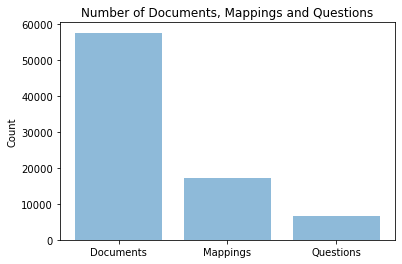

In [5]:
# Count of Documents and Questions
print(f'Number of documents: {doc_df.shape[0]}')
print(f'Number of mappings: {map_df.shape[0]}')
print(f'Number of questions: {question_df.shape[0]}')

objects = ('Documents', 'Mappings','Questions')
y_pos = np.arange(len(objects))
performance = [doc_df.shape[0], map_df.shape[0], question_df.shape[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Number of Documents, Mappings and Questions')

plt.show()

Significantly more documents than mappings - this means that some questions are mapped to multiple documents.

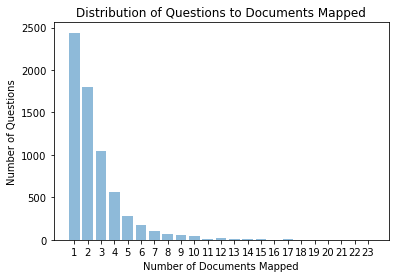

In [14]:
# Distribution of questions to number of documents mapped
qn_num_docmaps = {}
for v in dict(map_df['qid'].value_counts()).values():
    if v not in qn_num_docmaps:
        qn_num_docmaps[v] = 1
    else:
        qn_num_docmaps[v] += 1


objects = [k for k in qn_num_docmaps.keys()][::-1]
y_pos = np.arange(len(objects))
performance = [v for v in qn_num_docmaps.values()][::-1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Questions')
plt.xlabel('Number of Documents Mapped')
plt.title('Distribution of Questions to Documents Mapped')

plt.show()

In [7]:
map_df.head()

,qid,docid
0,0,18850
1,1,14255
2,2,308938
3,3,296717
4,3,100764


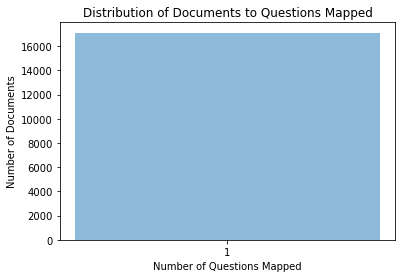

In [8]:
# Distribution of documents to questions mapped
qn_num_docmaps = {}
for v in dict(map_df['docid'].value_counts()).values():
    if v not in qn_num_docmaps:
        qn_num_docmaps[v] = 1
    else:
        qn_num_docmaps[v] += 1

objects = [k for k in qn_num_docmaps.keys()]
y_pos = np.arange(len(objects))
performance = [v for v in qn_num_docmaps.values()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Documents')
plt.xlabel('Number of Questions Mapped')
plt.title('Distribution of Documents to Questions Mapped')

plt.show()

From the graph above, we can see that out of 6648 questions, ~2500 of them are mapped to 1 document. Some questions are mapped to multiple documents, spanning from being mapped to 1 document all the way to 23 documents.

In [9]:
# Distribution of documents to questions mapped
map_df['docid'].value_counts()

18850     1
165246    1
499344    1
179893    1
354974    1
         ..
163043    1
339545    1
435940    1
104492    1
518310    1
Name: docid, Length: 17110, dtype: int64

We can see from above that all documents only have 1 question mapped to it.

# Investigate questions df

I just used a random text cleaner function from an old project, can replace it when we finalize what we want to include in our cleaner function.

In [56]:
# Stop word list to filter noise in bag of words
stop_list = stopwords.words('english')

WNL = WordNetLemmatizer()

punct_list = [punctuation[p] for p in range(len(punctuation))]
add_stop_words = ['class', 'div', 'description__text', 'ul', 
                  'li', 'br', 'ul', 'job', 'description', 'rich', 
                  'strong', 'to', 'apply', 'visit', 'the', 'and',
                  'make', 'at', 'you', 'we', 'our', 'would', 'via',
                  'pte', 'ltd', 'us', 'please', 'lt', 'weight', 'gt',
                  'span', 'em']

stop_list += punct_list + add_stop_words

def cleaner(x):
    try:
        output = []
        x = re.sub(r'<[\sa-zA-Z0-9=\-_/"]+>', ' ', x)
        for w in x.split():
            curr_word = WNL.lemmatize(w)
            curr_word = curr_word.lower()
            curr_word = re.sub(r'[^\w\s]', '', curr_word)
            if curr_word not in stop_list:
                output.append(curr_word)
        return ' '.join(output)
    except:
        return 'nil'

In [13]:
# Clean questions
question_df['clean_question'] = question_df.apply(lambda x: cleaner(x['question']), axis = 1)

# Get length of cleaned questions
question_df['question_length'] = question_df.apply(lambda x: len([i for i in x['clean_question'].split()]), axis = 1)
question_df.head()

,qid,question,timestamp,clean_question,question_length
0,0,What is considered a business expense on a bus...,Nov 8 '11 at 15:14,considered business expense business trip,5
1,1,Claiming business expenses for a business with...,May 13 '14 at 13:17,claiming business expense business income,5
2,2,Transferring money from One business checking ...,Jan 20 '16 at 20:31,transferring money one business checking anoth...,8
3,3,Having a separate bank account for business/in...,Mar 1 at 0:24,separate bank account businessinvesting busine...,6
4,4,Business Expense - Car Insurance Deductible Fo...,Mar 4 at 0:26,business expense car insurance deductible acc...,9


<Figure size 288x216 with 0 Axes>

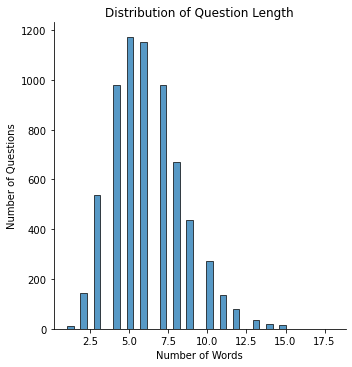

In [49]:
# Distribution of question length
plt.figure(figsize=(4, 3))
sns.displot(question_df['question_length'])
plt.ylabel('Number of Questions')
plt.xlabel('Number of Words')
plt.title('Distribution of Question Length')

# plt.rcParams["figure.figsize"] = (20,3)
plt.show()

Most questions fall between 4 to 8 words.

In [57]:
# Clean documents
doc_df['clean_doc'] = doc_df.apply(lambda x: cleaner(x['doc']), axis = 1)

# Get length of cleaned documents
doc_df['doc_length'] = doc_df.apply(lambda x: len([i for i in x['clean_doc'].split()]), axis = 1)
question_df.head()

,qid,question,timestamp,clean_question,question_length
0,0,What is considered a business expense on a bus...,Nov 8 '11 at 15:14,considered business expense business trip,5
1,1,Claiming business expenses for a business with...,May 13 '14 at 13:17,claiming business expense business income,5
2,2,Transferring money from One business checking ...,Jan 20 '16 at 20:31,transferring money one business checking anoth...,8
3,3,Having a separate bank account for business/in...,Mar 1 at 0:24,separate bank account businessinvesting busine...,6
4,4,Business Expense - Car Insurance Deductible Fo...,Mar 4 at 0:26,business expense car insurance deductible acc...,9


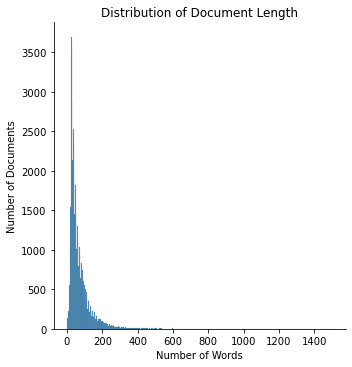

In [58]:
# Distribution of document length
sns.displot(doc_df['doc_length'])
plt.ylabel('Number of Documents')
plt.xlabel('Number of Words')
plt.title('Distribution of Document Length')

# plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [68]:
doc_df['doc_length'].value_counts()[:20]

28    1296
27    1261
26    1249
24    1249
29    1220
25    1183
23    1157
30    1095
31    1081
32    1051
33    1027
22    1012
34     949
35     926
36     890
21     882
39     851
37     831
38     812
40     790
Name: doc_length, dtype: int64